# Discrete Fourier Transform



Ever wondered how your favorite music app identifies songs with just a snippet of audio? Or how medical imaging reveals the inner workings of your body? The secret lies in a powerful tool called the Discrete Fourier Transform (DFT).
Think of the DFT as a decoder ring for signals. It takes a seemingly ordinary sequence of values and reveals the hidden symphony of frequencies within. Just like a prism splits sunlight into a rainbow, the DFT breaks down a signal into its constituent frequencies, each with its own amplitude and phase. This gives us a whole new perspective, unlocking a world of possibilities!



### How Does the Magic Happen?


The DFT works its magic by transforming a signal from the familiar time domain, where we see values changing over time, to the frequency domain, where we see the contribution of each frequency. Imagine it as switching from a movie of a person speaking to a musical score showing the notes they hit.

<div>
<img src="https://pythonnumericalmethods.studentorg.berkeley.edu/_images/24.02.02-time_frequency.png" width="500"/>
</div>


### What Does the DFT do?


At its heart, DFT is a "transform". It transforms a given input to an output. More specifically, DFT takes in a sequence of numbers, "transforms" them, and then spits out another sequence of numbers (which may be complex) of the same length. How are the input and output related?

\begin{equation}
X[k] = \sum_{n=0}^{N-1} x[n] \cdot e^{-i2\pi\frac{k}{N} n}%, \quad k = 0, 1, ..., N-1%
\end{equation}

where
$x[n]$ is the input sequence in the time domain,
$X[k]$ is the DFT output sequence in the frequency domain,
$N$ is the length of the input sequence,
$i$ is the imaginary unit ($i^2 = -1$),
$k$ is the frequency index and
$n$ is the time index.

Don't be overwhelmed by the equation, if you look at it carefully, you'll notice that each $X[k]$ is just a weighted sum of $x[n]$, i.e. DFT is just a linear transform, its just that the scalars over here can be complex numbers.



### Exercise: Implementing Discrete Fourier Transform (DFT) in Python

In this exercise, you will implement the Discrete Fourier Transform (DFT) algorithm in Python. Use the aforementioned formula, to calculate the DFT output sequence for the given input sequence in the time domain.

In [ ]:
import numpy as np

def DFT(x):
    N = len(x)
    X = np.zeros(N, dtype=np.complex64)
    iota = np.complex64(1.0j)
    pi = np.pi

    # Your code goes here

    return X

x = np.array([1, 2, 3, 4], dtype=np.complex64)
X = DFT(x)
print(X)

X_np = np.fft.fft(x)
print(X_np)

if np.allclose(X, X_np):
    print("Test passed! Output matches NumPy's FFT results.")
else:
    print("Test failed! Output does not match NumPy's FFT results.")


#### Hints

<details>
<summary>Hint 1</summary>
You can use NumPy's `exp` function to calculate the complex exponential term $ e^{-i \frac{2 \pi}{N} kn} $.
</details>

<details>
<summary>Hint 2</summary>
Iterate through each frequency index $ k $ from 0 to $ N-1 $.
</details>

<details>
<summary>Hint 3</summary>
Inside the loop, iterate through each time index $ n $ from 0 to $ N-1 $.
</details>

<details>
<summary>Hint 4</summary>
Sum up the products of each sample of $ x[n] $ and the corresponding exponential term for all $ n $.
</details>

<details>
<summary>Solution</summary>

```
for k in range(N):
    for n in range(N):
        X[k] += x[n] * np.exp(-iota * pi * 2 * k * n/N)
```


</details>


# 2D Discrete Fourier Transform

Ever zoomed in on a digital image and wondered how those tiny squares of color create such detailed pictures? Or how image editing software magically removes blemishes or sharpens blurry photos? The answer lies in the realm of the 2D Discrete Fourier Transform (DFT), a powerful tool that allows us to analyze and manipulate images in ways that would seem like magic to the naked eye.
Imagine the 2D DFT as an X-ray vision for images. It lets us peer beneath the surface and see the image in terms of its frequency components, revealing patterns and details that are invisible in the spatial domain. It's like having a superpower that allows you to understand the building blocks of any image!

The 2D DFT opens up a whole new world of possibilities when it comes to working with images:
*   Image enhancement: Sharpen blurry images, remove noise, and even restore
damaged photos by manipulating their frequency components.
*   Image compression: Shrink image file sizes without sacrificing quality by discarding less important frequency information. This is how JPEG and other image formats work!
*   Image analysis: Gain insights into the texture, patterns, and overall composition of an image by exploring its frequency content.
*   Medical imaging: Improve the clarity and detail of medical images like X-rays and MRIs, aiding in diagnosis and treatment.


### How Does it Work?

Here's how the 2D Discrete Fourier Transform is calculated for an image:

$$F(u, v) = \sum_{x=0}^{M-1} \sum_{y=0}^{N-1} f(x, y) \cdot e^{-i\cdot2\pi\left(\frac{ux}{M} + \frac{vy}{N}\right)}$$

In this formula:

*   $F(u, v)$ represents the 2D DFT coefficient at frequency indices $u$ and $v$.
*   $f(x, y)$ represents the pixel intensity at spatial coordinates $x$ and $y$.
*   $M$ and $N$ represent the dimensions of the image in the spatial domain.
*   The formula sums over all spatial coordinates $x$ and $y$ to compute the contribution of each pixel intensity to the DFT coefficient at frequency indices $u$ and $v$.


### Exercise: Implementing 2D Discrete Fourier Transform (DFT) in Python

In this exercise, you will implement the 2D Discrete Fourier Transform (DFT) algorithm in Python. Use the aforementioned formula, to calculate the DFT matrix for the given input image.

Note that the matrix in the frequency domain will be a matrix of complex numbers, and is not just limited to real numbers as was the case of the image.
To visualize such a matrix, we use the absolute values of the complex numbers i.e. the modulus of the number to visualize the 2D matrix.

Test failed! Output does not match NumPy's fft2 results.



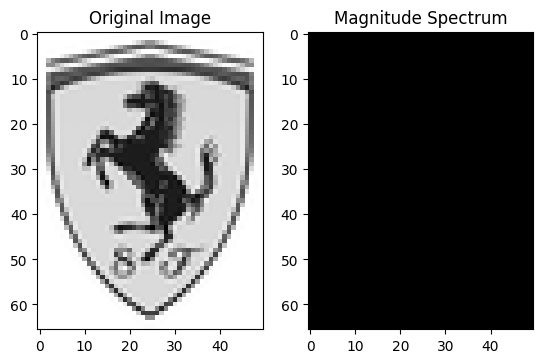

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import urllib.request
import io

IMAGE_URL = 'https://i.pinimg.com/736x/a9/4b/ab/a94babe6ef4cbfcd377ea6f1c0817730.jpg'
IMAGE_DATA = urllib.request.urlopen(IMAGE_URL)
IMAGE_FILE = io.BytesIO(IMAGE_DATA.read())
IMAGE = Image.open(IMAGE_FILE).convert('L')

BASE_WIDTH = 50
WPERCENT = (BASE_WIDTH / float(IMAGE.size[0]))
HSIZE = int((float(IMAGE.size[1]) * float(WPERCENT)))
IMAGE = IMAGE.resize((BASE_WIDTH, HSIZE), Image.Resampling.LANCZOS)

def DFT_2D(img):
    M, N = img.shape
    F = np.zeros((M, N), dtype=np.complex128)
    iota = np.complex64(1.0j)
    pi = np.pi

    # Your code here

    return F

# Load an image
img = np.array(IMAGE)

# Calculate 2D DFT using your function
F = DFT_2D(img)

# Calculate 2D DFT using numpy's library
F_np = np.fft.fft2(img)

# Check if the outputs match
if np.allclose(F, F_np):
    print("Test passed! Output matches NumPy's fft2 results.\n")
else:
    print("Test failed! Output does not match NumPy's fft2 results.\n")

# Display the original image
plt.subplot(1, 2, 1)
plt.imshow(img, cmap='gray')
plt.title('Original Image')

# Display the magnitude spectrum of the 2D DFT
plt.subplot(1, 2, 2)
plt.imshow(np.log(1 + np.abs(np.fft.fftshift(F))), cmap='gray')
plt.title('Magnitude Spectrum')

plt.show()


<details>
<summary>Solution</summary>

```
for u in range(M):
        for v in range(N):
            for x in range(M):
                for y in range(N):
                    F[u, v] += img[x, y] * np.exp(-iota * 2 * pi * (u * x / M + v * y / N))
```
</details>


### Properties of 2D DFT

In this section, we will explore and visualize various properties of the 2D DFT, what it reveals about the image, and how manipulating it can help us manipulate images.

#### Linearity




DFT's are linear. A DFT is a linear transformation, thus, it is natural that it satisfies the two properties of a linear transformation i.e.

*   Additivity: $\text{DFT}(A) + \text{DFT}(B) = \text{DFT}(A+B)$

*   Homogeneity of Degree 1: $\text{DFT}(\alpha \cdot A) = \alpha \cdot \text{DFT}(A)$

The code and illustration below will demonstrate additivity for DFTs.

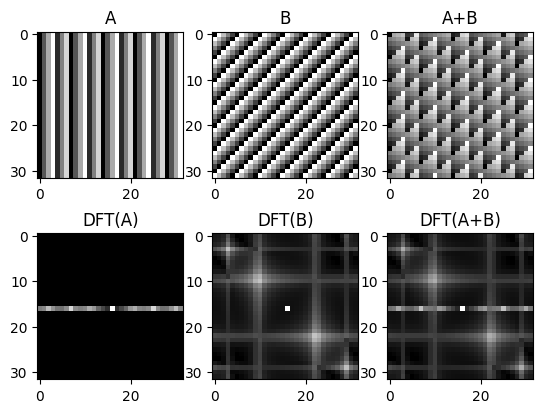

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

IMAGE1 = np.zeros((32, 32))
for i in range(32):
    for j in range(32):
        IMAGE1[i][j] = ((2*j)%7)/7

IMAGE2 = np.zeros((32, 32))

for i in range(32):
    for j in range(32):
        IMAGE2[i][j] = ((4*i-j)%5)/5

# Load an image
img1 = np.array(IMAGE1)
img2 = np.array(IMAGE2)
img_sum = np.array(IMAGE1 + IMAGE2)

F1 = np.fft.fft2(img1)
F2 = np.fft.fft2(img2)
F_sum = np.fft.fft2(img_sum)

plt.subplot(2, 3, 1)
plt.imshow(img1, cmap='gray')
plt.title('A')

plt.subplot(2, 3, 2)
plt.imshow(img2, cmap='gray')
plt.title('B')

plt.subplot(2, 3, 3)
plt.imshow(img_sum, cmap='gray')
plt.title('A+B')

plt.subplot(2, 3, 4)
plt.imshow(np.log(1 + np.abs(np.fft.fftshift(F1))), cmap='gray')
plt.title('DFT(A)')

plt.subplot(2, 3, 5)
plt.imshow(np.log(1 + np.abs(np.fft.fftshift(F2))), cmap='gray')
plt.title('DFT(B)')

plt.subplot(2, 3, 6)
plt.imshow(np.log(1 + np.abs(np.fft.fftshift(F_sum))), cmap='gray')
plt.title('DFT(A+B)')

plt.show()

#### Rotation

Rotation of images also rotates the DFT transform corresponding to that image. Rotating a matrix by 90 degrees clockwise in the spatial domain corresponds to a phase shift in the frequency domain. Specifically, rotating a matrix by 90 degrees clockwise swaps its rows and columns and flips the order of the elements in each row. This rotation in the spatial domain results in a rotation in the frequency domain.

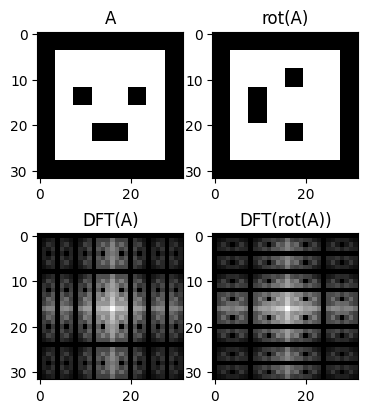

In [17]:
import numpy as np
import matplotlib.pyplot as plt

SMILEY = np.zeros((32, 32), dtype=int)

# Draw the smiley face
SMILEY[4:28, 4:28] = 1  # Draw the face
SMILEY[12:16, 8:12] = 0  # Erase part of the face for the mouth
SMILEY[12:16, 20:24] = 0  # Erase part of the face for the eyes
SMILEY[20:24, 12:20] = 0

# Load an image
img1 = np.array(SMILEY)
img2 = np.rot90(SMILEY, k=-1)

F1 = np.fft.fft2(img1)
F2 = np.fft.fft2(img2)

plt.subplot(2, 3, 1)
plt.imshow(img1, cmap='gray')
plt.title('A')

plt.subplot(2, 3, 2)
plt.imshow(img2, cmap='gray')
plt.title('rot(A)')

plt.subplot(2, 3, 4)
plt.imshow(np.log(1 + np.abs(np.fft.fftshift(F1))), cmap='gray')
plt.title('DFT(A)')

plt.subplot(2, 3, 5)
plt.imshow(np.log(1 + np.abs(np.fft.fftshift(F2))), cmap='gray')
plt.title('DFT(rot(A))')

plt.show()